# **Investigation of Stroop Effect**
##### An Inferential Statistics Analysis
<br>
### **Inferential Statistics** | Udacity **Data Analyst Nanodegree**

<br>
<h3 style="text-align:left;">Karra Anand</h3>
<h3 style="text-align:left;">15<sup>th</sup> March 2018</h3>

___
___

<h2><b><u>Table of Contents</u></b></h2>
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#wrangling"><b>Defining the variables</b></a></li>
</ul>

___
___

<a id='intro'></a>
<h2><b><u>Introduction</u></b></h2>
<br>
This project will investigate a classical phenomenon from experimental psychology called [Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect). We will create a hypothesis regarding the outcome of the task. Then, look at some data collected from others who have performed the same task and will compute some statistics describing the results. Finally, we will interpret the results in terms of our hypotheses.
<br>
<br>
<h3 style="text-align:left;">Background Information</h3>
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition. <br>
You can check out the task for yourself [here](https://faculty.washington.edu/chudler/java/ready.html).
<br>

___
___

<a id='defining-varaibles-and-hypothesis-and-type-of-test'></a>
<h2><b><u>Defining Variables, Hypothesis and Type of test</u></b></h2>
<br>
<h3 style="text-align:left;">Defining variables</h3>
Before we define our hypothesis, we first need to define our variables. Specifically, in this case our **dependant** and **independant** variables.
<br>
<br>
**Independent variable = Words conditions** (Congruent or Incongruent)
<br>
**Dependent variable = Average time taken to complete the task** (in seconds)
<br>
<br>
<h3 style="text-align:left;">Mathematical notation</h3>
Let, the **average** and **standard** deviation of time taken to complete the task in the **congruent** words condition be <b>&mu;<sub>cong</sub></b> and <b>&sigma;<sub>cong</sub></b> respectively.
<br>
and, the **average** and **standard deviation** of time taken to complete the task in the **incongruent** words condition be <b>&mu;<sub>incong</sub></b> and <b>&sigma;<sub>incong</sub></b> respectively.
<br>
<br>
<h3 style="text-align:left;">Defining hypothesis</h3>
Next, we define the null and alternate hypothesis for this task as follows:
<br>
<br>
**Null Hypothesis (H<sub>0</sub>)**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: &mu;<sub>cong</sub> &cong; &mu;<sub>incong</sub> 
<br>
**Alternate Hypothesis (H<sub>1</sub>)**&nbsp;: &mu;<sub>cong</sub> &ne; &mu;<sub>incong</sub>
<br>
<br>
<h3 style="text-align:left;">Type of test</h3>
We want to investigate the effect of the words condition on the average time taken to complete the task. From measuring the time taken to complete the task under both the words conditions we can see that it taken more time on average for the incongruent words conditions. Hence, we will be testing if this change is significant enough to draw an inference between the words condition and average time taken to complete the task. For this, we use a **one-tailed test** with an **&alpha;-level** of **0.05**.
<br>
Hence, **&alpha; = 0.05**

___
___

<a id='exploring-the-dataset'></a>
<h2><b><u>Exploring the dataset</u></b></h2>
<br>

A CSV file containing the times taken to complete the test for multiple iterations for both the congruent and incongruent words condition is present in the project directory (if not, make necessary modifications to the file path in the following code). The data in the CSV file is then loaded into a Pandas DataFrame.
<br>
<br>
(We use a Pandas DataFrame as it has a number of functions built-in to compute various statistical measures)

In [1]:
# Importing the necessary modules
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
STROOP_DATA = "stroopdata.csv" 

csv_file = []
with open(STROOP_DATA, 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        csv_file.append(row)
print (csv_file)

[['12.079', '19.278'], ['16.791', '18.741'], ['9.564', '21.214'], ['8.630', '15.687'], ['14.669', '22.803'], ['12.238', '20.878'], ['14.692', '24.572'], ['8.987', '17.394'], ['9.401', '20.762'], ['14.480', '26.282'], ['22.328', '24.524'], ['15.298', '18.644'], ['15.073', '17.510'], ['16.929', '20.330'], ['18.200', '35.255'], ['12.130', '22.158'], ['18.495', '25.139'], ['10.639', '20.429'], ['11.344', '17.425'], ['12.369', '34.288'], ['12.944', '23.894'], ['14.233', '17.960'], ['19.710', '22.058'], ['16.004', '21.157']]


We can see that our CSV file has been read properly.
<br>
<br>
Next, we store this data in a Pandas DataFrame.

In [3]:
stroop_data_df = pd.DataFrame((csv_file))
stroop_data_df.columns = ['congruent','incongruent']
stroop_data_df = stroop_data_df.convert_objects(convert_numeric=True)
print (stroop_data_df)

    congruent  incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


/home/marvin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


<br>
The **mean**, **median**, **variance** and **standard deviation** for the **congruent words condition** is given below:

In [4]:
print ("Mean               = ",round(stroop_data_df["congruent"].mean(),3))
print ("Median             = ",round(stroop_data_df["congruent"].median(),3))
print ("Variance           = ",round(stroop_data_df["congruent"].var(),3))
print ("Standard deviation = ",round(stroop_data_df["congruent"].std(),3))

Mean               =  14.051
Median             =  14.357
Variance           =  12.669
Standard deviation =  3.559


<br>
The **mean**, **median**, **variance** and **standard deviation** for the **incongruent words condition** is given below:

In [5]:
print ("Mean               = ",round(stroop_data_df["incongruent"].mean(),3))
print ("Median             = ",round(stroop_data_df["incongruent"].median(),3))
print ("Variance           = ",round(stroop_data_df["incongruent"].var(),3))
print ("Standard deviation = ",round(stroop_data_df["incongruent"].std(),3))

Mean               =  22.016
Median             =  21.017
Variance           =  23.012
Standard deviation =  4.797


From the above results we observe that:
<br>
<br>
&mu;<sub>cong</sub> = 14.051 <br>
&sigma;<sub>cong</sub> = 3.559
<br>
<br>
&mu;<sub>incong</sub> = 22.016 <br>
&sigma;<sub>incong</sub> = 4.797

<br>
We can observe these statistical measures in the following plots:
<br>
<br>

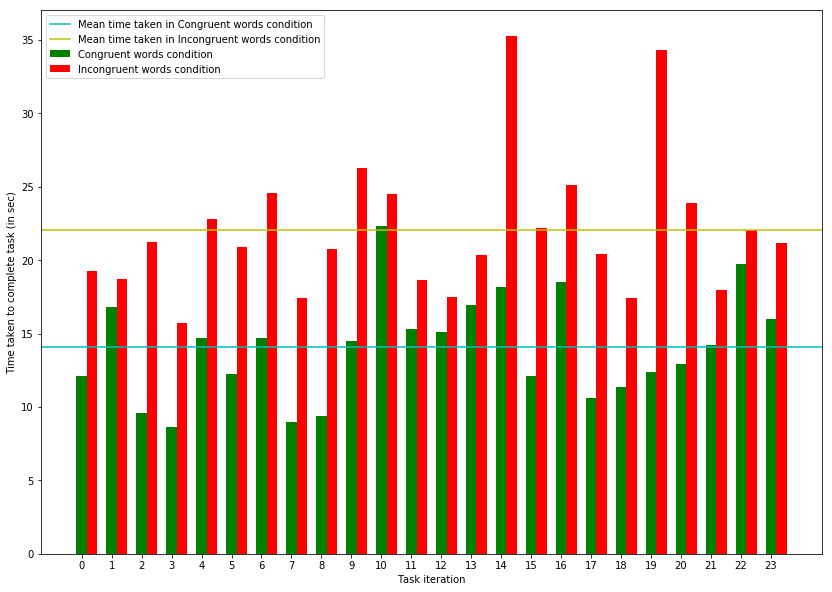

In [6]:
n =24
width = 0.35       # Width of the bars

ind = np.arange(n)  # x locations for the groups
width = 0.35       # Width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(ind, stroop_data_df["congruent"], width, color='g',label="Congruent words condition") # Congruent word condition subplo
rects2 = ax.bar(ind + width, stroop_data_df["incongruent"], width, color='r',label="Incongruent words condition") # Incongruent word condition subplot
ax.axhline(stroop_data_df["congruent"].mean(),label="Mean time taken in Congruent words condition",color="c") # Mean for congruent condition
ax.axhline(stroop_data_df["incongruent"].mean(),label="Mean time taken in Incongruent words condition",color="y") # Mean for incongruent condition

ax.set_xlabel("Task iteration")
ax.set_ylabel("Time taken to complete task (in sec)")
plt.xticks(np.arange(0, 24, 1))
fig.set_size_inches(14,10) # Size of the plot
plt.legend()

plt.show()

From the above bar plot we can clearly notice that, it generally takes more time to complete the task in the incongruent words condition compared to the congruent words condition.
<br>
<br>
Furthermore, the average times for the incongruent words condition is also higher than that of the congruent words condition.

<br>
As defined previously, <br>
**Confidence level**, &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**&alpha;&nbsp;&nbsp;&nbsp;&nbsp; = 0.05** <br>
**Critical statistic value, z<sub>CR</sub> = 1.6449**

___
___

<a id='statistical-test'></a>
<h2><b><u>Statistical test</u></b></h2>
<br>

The z-value for the incongruent words condition is given by,
<br>
<br>

In [2]:
%%latex
\begin{align*}
z = {\mu_{incong} - \mu_{cong} \over \sigma_{cong}/\sqrt n} \\
\\
Substituting \ the\ values, \\
\implies z = {22.016 - 14.051 \over 3.559 /\sqrt24} \\
z = 10.964 \\
z_{CR} = 1.6449 \\
z > z_{CR} \\
\end{align*}

<IPython.core.display.Latex object>

Hence, z lies on the critical region.
<br>
<br>
**Hence, the null hypothesis (H<sub>0</sub>) is rejected.**
<br>
<br>
Hence, our alternate hypothesis, H<sub>1</sub> i.e. &mu;<sub>cong</sub> &ne; &mu;<sub>incong</sub> is true.

___
___

<a id='conclusion'></a>
<h2><b><u>Conclusion</u></b></h2>
<br>